# Homework 3

# Regression

## Imports

In [51]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Q1

Setup

In [52]:
df = pd.read_csv('http://www.stat.ufl.edu/~winner/data/clinton1.dat', sep='\s\s+', names= ['countyName', 'percentVoting', 'medianAge', 'meanSavings', 'perCapitalIncome', 'percentPoverty', 'percentVeterans', 'percentFemale', 'popDensity', 'percentNursing', 'crimeIndex'], engine='python')
df[:5]

,countyName,percentVoting,medianAge,meanSavings,perCapitalIncome,percentPoverty,percentVeterans,percentFemale,popDensity,percentNursing,crimeIndex
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141


## Q2

The two regressors with the worst p-values are `medianAge` and `crimeIndex`

In [53]:
y, X = dmatrices('percentVoting ~ medianAge + meanSavings + perCapitalIncome + percentPoverty + percentVeterans + percentFemale + popDensity + percentNursing + crimeIndex', data=df, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:          percentVoting   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sun, 16 Apr 2017   Prob (F-statistic):          4.12e-224
Time:                        16:50:12   Log-Likelihood:                -9576.0
No. Observations:                2704   AIC:                         1.917e+04
Df Residuals:                    2694   BIC:                         1.923e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -38.3094      5.818  

# Q3

In [54]:
def formula(listOfRegressors):
    return "percentVoting ~ " + " + ".join(listOfRegressors)

## Q4

In [55]:
def rsquared(listOfRegressors):
    calculation = formula(listOfRegressors)
    y, X = dmatrices(calculation, data=df, return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    return result.rsquared

## Q5

In [56]:
def best_next_regressor(current_regressor_list, all_regressors_list):
    baseline = rsquared(current_regressor_list)
    improvements = {}
    regressors = list(set(all_regressors_list) - set(current_regressor_list))
    for regressor in regressors:
        temp = current_regressor_list[:]
        temp.append(regressor)
        improvements[regressor] = rsquared(temp)
    bestRegressor = max(improvements, key=improvements.get)
    return (bestRegressor, improvements[bestRegressor])

### reserved

# K-Nearest Neighbors

## Imports

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

## Q9

A `Target` column has been created on the dataframe, with value counts of 1469 for 0 and 1235 for 1

In [83]:
df['Target'] = df.apply(lambda row: 1 if row['percentVoting'] >= 40 else 0, axis=1)
df['Target'].value_counts()

0    1469
1    1235
Name: Target, dtype: int64

## Q10

The data has been separated into X and y variables for classification using the variables `Target`, `percentPoverty`, and `popDensity`

In [84]:
Y, X = dmatrices("Target ~ percentPoverty + popDensity", df, return_type="dataframe")
y = Y['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Q11

Accuracy was tested for each of the neighbor amounts listed

In [85]:
neighborAmounts = [1, 3, 5, 10, 20, 50, 100, 1000]
for amount in neighborAmounts:
    print str(amount) + " Neighbors"
    
    model = neighbors.KNeighborsClassifier(n_neighbors=amount, weights='uniform', p=2)
    model.fit(X_train, y_train)
    
    prediction_on_training = model.predict(X_train)
    training_score = metrics.accuracy_score(y_train, prediction_on_training)
    print "Training score: " + str(training_score)
    
    test_predictions = model.predict(X_test)
    testing_score = metrics.accuracy_score(y_test, test_predictions)
    print "Testing score: " + str(testing_score)
    print

1 Neighbors
Training score: 0.997885835095
Testing score: 0.600985221675

3 Neighbors
Training score: 0.788054968288
Testing score: 0.635467980296

5 Neighbors
Training score: 0.748414376321
Testing score: 0.630541871921

10 Neighbors
Training score: 0.720401691332
Testing score: 0.646551724138

20 Neighbors
Training score: 0.690274841438
Testing score: 0.658866995074

50 Neighbors
Training score: 0.683932346723
Testing score: 0.662561576355

100 Neighbors
Training score: 0.677589852008
Testing score: 0.663793103448

1000 Neighbors
Training score: 0.567124735729
Testing score: 0.576354679803



## Q12

While the sheer amount of data makes the graph difficult to in

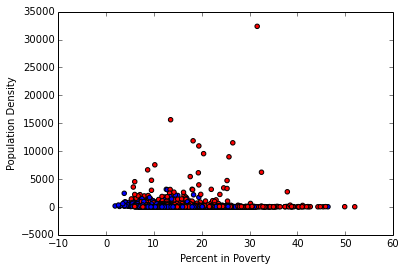

In [96]:
scatter(df['percentPoverty'], df['popDensity'], c=df['Target'], cmap='bwr')
xlabel("Percent in Poverty")
ylabel("Population Density")